Ingresa una expresión aritmética: 1+2*3


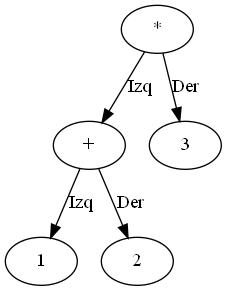

In [2]:
import graphviz
from IPython.display import Image

class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierda = None
        self.derecha = None

def construir_arbol_expresion(expresion):
    expresion = expresion.replace(" ", "")
    return construir_sub_arbol(expresion)

def construir_sub_arbol(expresion):
    if not expresion:
        return None
    
    operadores = {'+', '-', '*', '/'}
    parentesis = 0
    indice_operador = -1
    for i, caracter in enumerate(reversed(expresion)):
        if caracter == ')':
            parentesis += 1
        elif caracter == '(':
            parentesis -= 1
        elif caracter in operadores and parentesis == 0:
            indice_operador = len(expresion) - i - 1
            break
    
    if indice_operador == -1:
        return Nodo(expresion)
    
    nodo = Nodo(expresion[indice_operador])
    nodo.izquierda = construir_sub_arbol(expresion[:indice_operador])
    nodo.derecha = construir_sub_arbol(expresion[indice_operador + 1:])
    return nodo

def generar_dot_arbol(raiz):
    dot_arbol = graphviz.Digraph(comment='Árbol de Expresiones')
    
    def agregar_nodos(nodo):
        if nodo:
            dot_arbol.node(str(id(nodo)), str(nodo.valor))
            if nodo.izquierda:
                dot_arbol.edge(str(id(nodo)), str(id(nodo.izquierda)), label='Izq')
                agregar_nodos(nodo.izquierda)
            if nodo.derecha:
                dot_arbol.edge(str(id(nodo)), str(id(nodo.derecha)), label='Der')
                agregar_nodos(nodo.derecha)
    
    agregar_nodos(raiz)
    return dot_arbol

expresion = input("Ingresa una expresión aritmética: ")
raiz_arbol = construir_arbol_expresion(expresion)
dot_arbol = generar_dot_arbol(raiz_arbol)
dot_arbol.render('arbol_expresion', format='png', cleanup=True)

Image('arbol_expresion.png')
